<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [1]:
%matplotlib inline
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

# Numerical Differentiation

**GOAL:**  Given a set of $N+1$ points $(x_i, y_i)$ compute the derivative of a given order to a specified accuracy.

**Approach:** Find the interpolating polynomial $P_N(x)$ and differentiate that.

### Newton's Form

For ease of analysis we will write $P_N(x)$ in Newton's form which looks like

$$P_N(x) = \sum^N_{j=0} a_j n_j(x)$$

where 

$$n_j(x) = \prod^{j-1}_{i=0} (x - x_i)$$

Different from lagrange, here we compute value of aj's using yi's.

The $a_j = [y_0, \ldots, y_j]$ are the divided differences defined in general as

$$[y_i] = y_i \quad i \in \{0,\ldots, N+1\}$$

and

$$[y_i, \ldots , y_{i+j}] = \frac{[y_{i+1}, \ldots , y_{i + j}] - [y_{i},\ldots,y_{i+j-1}]}{x_{i+j} - x_{i}} \quad i \in \{0,\ldots,N+1 - j\} \quad j \in \{1,\ldots, N+1\}$$

These formulas are recursively defined but not so helpful, here are a few examples to start out with:

$$[y_0] = y_0$$

$$[y_0, y_1] = \frac{y_1 - y_0}{x_1 - x_0}$$

$$[y_0, y_1, y_2] = \frac{[y_1, y_2] - [y_0, y_1]}{x_{2} - x_{0}} = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0} = \frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)}$$

The benefit of writing a polynomial like this is that it isolates the $x$ dependence (we can easily take derivatives of this form).

In general then $P_N(x)$ can be written in Newton's form as

$$P_N(x) = y_0 + (x-x_0)[y_0, y_1] + (x - x_0) (x - x_1) [y_0, y_1, y_2] + \cdots + (x-x_0) (x-x_1) \cdots (x-x_{N-1}) [y_0, y_1, \ldots, y_{N}]$$

As another concrete example consider and quadratic polynomial written in Newton's form

$$P_2(x) = [y_0] + (x - x_0) [y_0, y_1] + (x - x_0)(x - x_1) [y_0, y_1, y_2] \\= y_0 + (x - x_0) \frac{y_1 - y_0}{x_1 - x_0} + (x - x_0)(x - x_1) \left ( \frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)} \right )$$

Recall that the interpolating polynomial of degree $N$ through these points is unique!

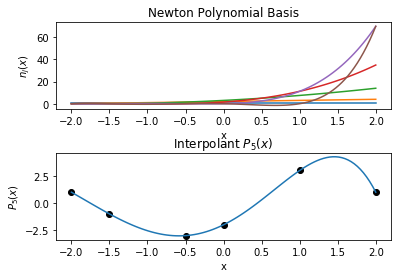

In [2]:
# divided differnece is defined as  [yi, ... yi+j]
def divided_difference(x, y, N=50):
    """Compute the Nth divided difference using *x* and *y*"""
    if N == 0:
        raise Exception("Reached recursion limit!")
    
    # Reached the end of the recurssion
    if y.shape[0] == 1: #there're one values in y
        return y[0]
    elif y.shape[0] == 2: #there're two values in y
        return (y[1] - y[0]) / (x[1] - x[0])
    else:
        return (divided_difference(x[1:], y[1:], N=N-1) - divided_difference(x[:-1], y[:-1], N=N-1)) / (x[-1] - x[0])
# N here is to do the count, making sure we don't get beyond the recursion limit.
# last else statement calculate the recursion defined above.
    
# Calculate a polynomial in Newton Form
data = numpy.array([[-2.0, 1.0], [-1.5, -1.0], [-0.5, -3.0], [0.0, -2.0], [1.0, 3.0], [2.0, 1.0]])
N = data.shape[0] - 1
x = numpy.linspace(-2.0, 2.0, 100)

# Construct basis functions (the nj function defined above)
newton_basis = numpy.ones((N + 1, x.shape[0]))
for j in range(N + 1):
    for i in range(j):
        newton_basis[j, :] *= (x - data[i, 0])

# Construct full polynomial
P = numpy.zeros(x.shape)
for j in range(N + 1):
    P += divided_difference(data[:j + 1, 0], data[:j + 1, 1]) * newton_basis[j, :]
    
# Plot basis and interpolant
fig = plt.figure()
fig.subplots_adjust(hspace=.5)

axes = [None, None]
axes[0] = fig.add_subplot(2, 1, 1)
axes[1] = fig.add_subplot(2, 1, 2)

for j in range(N + 1):
    axes[0].plot(x, newton_basis[j, :])
    axes[1].plot(data[j, 0], data[j, 1],'ko')
axes[1].plot(x, P)

axes[0].set_title("Newton Polynomial Basis")
axes[0].set_xlabel("x")
axes[0].set_ylabel("$n_j(x)$")

axes[1].set_title("Interpolant $P_%s(x)$" % N)
axes[1].set_xlabel("x")
axes[1].set_ylabel("$P_%s(x)$" % N)

plt.show()

### Error Analysis

Given $N + 1$ points we can form an interpolant $P_N(x)$ of degree $N$ where

$$f(x) = P_N(x) + R_N(x)$$

We know from Lagrange's Theorem that the remainder term looks like

$$R_N(x) = (x - x_0)(x - x_1)\cdots (x - x_{N})(x - x_{N+1}) \frac{f^{(N+1)}(c)}{(N+1)!}$$

noting that we need to require that $f(x) \in C^{N+1}$ on the interval of interest.  Taking the derivative of the interpolant $P_N(x)$ then leads to 

$$P_N'(x) = [y_0, y_1] + ((x - x_1) + (x - x_0)) [y_0, y_1, y_2] + \cdots + \left(\sum^{N-1}_{i=0}\left( \prod^{N-1}_{j=0,~j\neq i} (x - x_j) \right )\right ) [y_0, y_1, \ldots, y_N]$$

Similarly we can find the derivative of the remainder term $R_N(x)$ as

$$R_N'(x) = \left(\sum^{N}_{i=0} \left( \prod^{N}_{j=0,~j\neq i} (x - x_j) \right )\right ) \frac{f^{(N+1)}(c)}{(N+1)!}$$

Now if we consider the approximation of the derivative evaluated at one of our data points $(x_k, y_k)$ these expressions simplify such that

$$f'(x_k) = P_N'(x_k) + R_N'(x_k)$$

If we let $\Delta x = \max_i |x_k - x_i|$ we then know that the remainder term will be $\mathcal{O}(\Delta x^N)$ as $\Delta x \rightarrow 0$ thus showing that this approach converges and we can find arbitrarily high order approximations (ignoring floating point error).

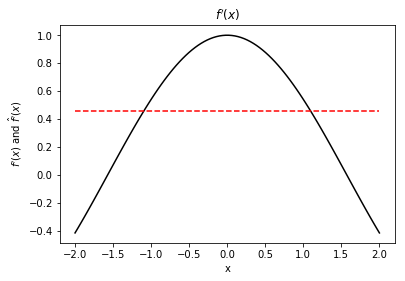

In [3]:
# Compute the approximation to the derivative
# data = numpy.array([[-2.0, 1.0], [-1.5, -1.0], [-0.5, -3.0], [0.0, -2.0], [1.0, 3.0], [2.0, 1.0]])
num_points = 3
data = numpy.empty((num_points, 2))
data[:, 0] = numpy.linspace(-2.0, 2.0, num_points)
data[:, 1] = numpy.sin(data[:, 0])
N = data.shape[0] - 1
x_fine = numpy.linspace(-2.0, 2.0, 100)

# General form of derivative of P_N'(x) [we want to get the derivative of a function in an interval instead of just at a point]
P_prime = numpy.zeros(x.shape)
newton_basis_prime = numpy.empty(x.shape)
product = numpy.empty(x.shape)
for n in range(N + 1):
    newton_basis_prime = 0.0
    for i in range(n):
        product = 1.0
        for j in range(n):
            if j != i:
                product *= (x - data[j, 0]) # calculate the product of (x-xi's)
        newton_basis_prime += product #then sum all these up
    P_prime += divided_difference(data[:n+1, 0], data[:n+1, 1]) * newton_basis_prime # the outer loop is calculating all the sums
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, numpy.cos(x), 'k')
axes.plot(x, P_prime, 'r--')

axes.set_title("$f'(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$f'(x)$ and $\hat{f}'(x)$")

plt.show()

What's the order of original polynomial? 2. Since the derivative is a linear function
Try change the initial number to 4, then you would get a red curve.

##### Examples

Often in practice we only use a small number of data points to derive a differentiation formula.  In the context of differential equations we also often have $f(x)$ so that $f(x_k) = y_k$ and we can approximate the derivative of a known function $f(x)$.

### Example 1:  1st order Forward and Backward Differences

Using 2 points we can get an approximation that is $\mathcal{O}(\Delta x)$:

$$f'(x) \approx P_1'(x) = [y_0, y_1] = \frac{y_1 - y_0}{x_1 - x_0} = \frac{y_1 - y_0}{\Delta x} = \frac{f(x_1) - f(x_0)}{\Delta x}$$

as \delta{x} goes to zero, we get better approximation of the derivative.
we want to get the derivative of point x_i, we can either use[x_i-1, x_i]  "backward" or [x_i, x_i+1] "forward"

We can also calculate the error as

$$R_1'(x) = -\Delta x \frac{f''(c)}{2}$$

a function if is not continuous or smooth enough, might cause issue here.

We can also derive the "forward" and "backward" formulas by considering the question slightly differently.  Say we want $f'(x_n)$, then the "forward" finite-difference can be written as

$$f'(x_n) \approx D_1^+ = \frac{f(x_{n+1}) - f(x_n)}{\Delta x}$$

and the "backward" finite-difference as

$$f'(x_n) \approx D_1^- = \frac{f(x_n) - f(x_{n-1})}{\Delta x}$$

"D" notes for "difference", 1 here means up to first order difference.

Note these approximations should be familiar to use as the limit as $\Delta x \rightarrow 0$ these are no longer approximations but equivalent definitions of the derivative at $x_n$.

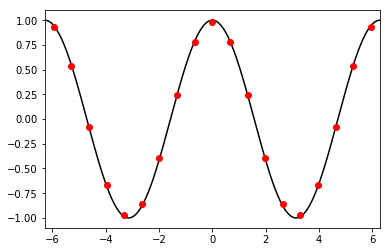

In [4]:
f = lambda x: numpy.sin(x)
f_prime = lambda x: numpy.cos(x)

# Use uniform discretization
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 20
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] - x_hat[0] #here xi's are equally spaced, so no need to update value each time.!!!!!!!!!

# Compute forward difference using a loop
f_prime_hat = numpy.empty(x_hat.shape)
for i in range(N - 1):
    f_prime_hat[i] = (f(x_hat[i+1]) - f(x_hat[i])) / delta_x
f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x # for the last value, use backward to get the derivative

########### Vector based calculation [use it if you can! Python is bad at dealing with loops]#####################
# f_prime_hat[:-1] = (f(x_hat[1:]) - f(x_hat[:-1])) / (delta_x)
# Use first-order differences for points at edge of domain
# f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x  # Backward Difference at x_N

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_prime(x), 'k') # the black curve represents for the true derivative of function f
axes.plot(x_hat + 0.5 * delta_x, f_prime_hat, 'ro')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((-1.1, 1.1))

plt.show()

#### Aside:  Computing Order of Convergence

$$\begin{aligned}
    e(\Delta x) &= C \Delta x^n \\
    \log e(\Delta x) &= \log C + n \log \Delta x
\end{aligned}$$

Slope of line is $n$ when computing this!  We can also match the first point by solving for $C$:

$$C = e^{\log e(\Delta x) - n \log \Delta x}$$

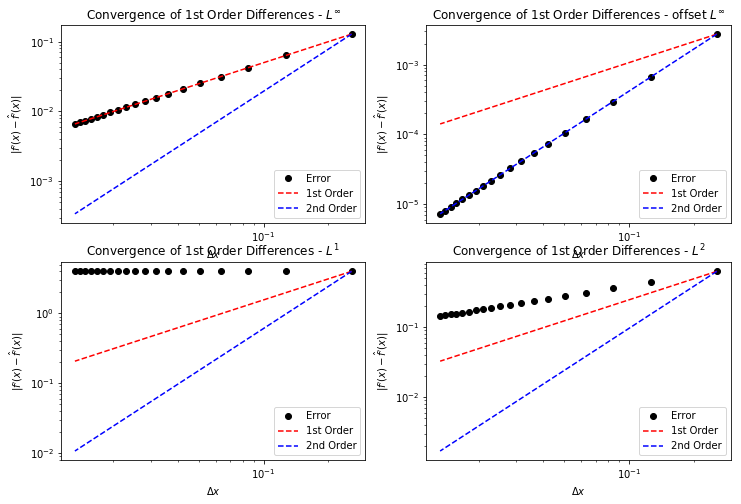

In [5]:
# Compute the error as a function of delta_x
N_range = numpy.arange(50, 1000, 50, dtype=int)
delta_x = numpy.empty(N_range.shape)
error = numpy.empty((N_range.shape[0], 4))
for (i, N) in enumerate(N_range):
    x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
    delta_x[i] = x_hat[1] - x_hat[0]

    # Compute forward difference
    f_prime_hat = numpy.empty(x_hat.shape)
    f_prime_hat[:-1] = (f(x_hat[1:]) - f(x_hat[:-1])) / (delta_x[i])

    # Use first-order differences for points at edge of domain
    f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x[i]  # Backward Difference at x_N
    
    error[i, 0] = numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=numpy.infty)
    error[i, 1] = numpy.linalg.norm(numpy.abs(f_prime(x_hat + 0.5 * delta_x[i]) - f_prime_hat), ord=numpy.infty) #shiting the approximation by half delta x
    error[i, 2] = numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=1) # one norm
    error[i, 3] = numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=2) # two norm
    
error = numpy.array(error)
delta_x = numpy.array(delta_x)
    
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figheight(fig.get_figheight() * 2)
# plt.rc('legend', fontsize=6)
# plt.rc('font', size=6)

error_type = ['$L^\infty$', 'offset $L^\infty$', '$L^1$', '$L^2$']
for i in range(error.shape[1]):
    axes = fig.add_subplot(2, 2, i + 1)
    axes.loglog(delta_x, error[:, i], 'ko', label="Error")

    order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
    axes.loglog(delta_x, order_C(delta_x[0], error[0, i], 1.0) * delta_x**1.0, 'r--', label="1st Order")
    axes.loglog(delta_x, order_C(delta_x[0], error[0, i], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
    axes.legend(loc=4)
    axes.set_title("Convergence of 1st Order Differences - %s" % error_type[i])
    axes.set_xlabel("$\Delta x$")
    axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")

plt.show()

# see what first order convergence and second order convergence should look like.

You can see here L1 is not converging at all, and L2 converges slower than we thought it should. Why this happened?

Answer:



### Example 2: 2nd Order Centered Difference

Now lets use 3 points to calculate the 2nd order accurate finite-difference.  Consider the points $(x_{n}, y_{n})$, $(x_{n-1}, y_{n-1})$, and $(x_{n+1}, y_{n+1})$, from before we have

$$P_2'(x) = [f(x_n), f(x_{n+1})] + ((x - x_n) + (x - x_{n+1})) [f(x_n), f(x_{n+1}), f(x_{n-1})]$$

$$= \frac{f(x_{n+1}) - f(x_n)}{x_{n+1} - x_n} + ((x - x_n) + (x - x_{n+1})) \left ( \frac{f(x_{n-1}) - f(x_{n+1})}{(x_{n-1} - x_{n+1})(x_{n-1} - x_n)} - \frac{f(x_{n+1}) - f(x_n)}{(x_{n+1} - x_n)(x_{n-1} - x_n)} \right )$$

Evaluating at $x_n$ and assuming the points $x_{n-1}, x_n, x_{n+1}$ are evenly spaced leads to

$$P_2'(x_n) = \frac{f(x_{n+1}) - f(x_n)}{\Delta x} - \Delta x \left ( \frac{f(x_{n-1}) - f(x_{n+1})}{2\Delta x^2} + \frac{f(x_{n+1}) - f(x_n)}{\Delta x^2} \right )$$

$$=\frac{f(x_{n+1}) - f(x_n)}{\Delta x} - \left ( \frac{f(x_{n+1}) - 2f(x_n) + f(x_{n-1})}{2\Delta x}\right )$$

$$=\frac{2f(x_{n+1}) - 2f(x_n) - f(x_{n+1}) + 2f(x_n) - f(x_{n-1})}{2 \Delta x}$$

$$=\frac{f(x_{n+1}) - f(x_{n-1})}{2 \Delta x}$$

This finite-difference is second order accurate and is centered about the point it is meant to approximate ($x_n$).  We can show that it is second order by again considering the remainder term's derivative

$$R_2'(x) = \left(\sum^{2}_{i=0} \left( \prod^{2}_{j=0,~j\neq i} (x - x_j) \right )\right ) \frac{f'''(c)}{3!}$$ 

$$= \left ( (x - x_{n+1}) (x - x_{n-1}) + (x-x_n) (x-x_{n-1}) + (x-x_n)(x-x_{n+1}) \right ) \frac{f'''(c)}{3!}$$

Again evaluating this expression at $x = x_n$ and assuming evenly space points we have

$$R_2'(x_n) = -\Delta x^2 \frac{f'''(c)}{3!}$$

showing that our error is $\mathcal{O}(\Delta x^2)$.

Code demo...

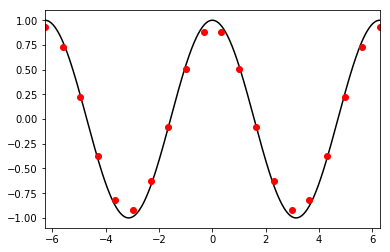

In [6]:
f = lambda x: numpy.sin(x)
f_prime = lambda x: numpy.cos(x)

# Use uniform discretization
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 20
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] - x_hat[0]

# Compute derivative
f_prime_hat = numpy.empty(x_hat.shape)
f_prime_hat[1:-1] = (f(x_hat[2:]) - f(x_hat[:-2])) / (2 * delta_x)

# Use first-order differences for points at edge of domain
f_prime_hat[0] = (f(x_hat[1]) - f(x_hat[0])) / delta_x     # Forward Difference at x_0
f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x  # Backward Difference at x_N
# f_prime_hat[0] = (-3.0 * f(x_hat[0]) + 4.0 * f(x_hat[1]) - f(x_hat[2])) / (2.0 * delta_x)
# f_prime_hat[-1] = (3.0 * f(x_hat[-1]) - 4.0 * f(x_hat[-2]) + f(x_hat[-3])) / (2.0 * delta_x)

fig = plt.figure()
plt.rcdefaults()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_prime(x), 'k')
axes.plot(x_hat, f_prime_hat, 'ro')
axes.set_xlim((x[0], x[-1]))
# axes.set_ylim((-1.1, 1.1))

plt.show()

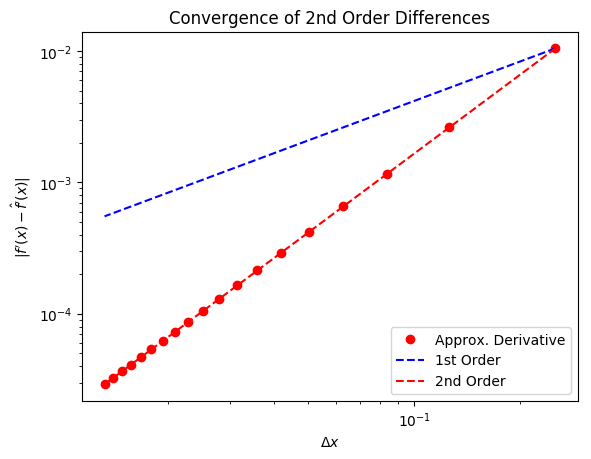

In [7]:
# Compute the error as a function of delta_x
delta_x = []
error = []
# for N in range(2, 101):
for N in range(50, 1000, 50):
    x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N + 1)
    delta_x.append(x_hat[1] - x_hat[0])

    # Compute derivative
    f_prime_hat = numpy.empty(x_hat.shape)
    f_prime_hat[1:-1] = (f(x_hat[2:]) - f(x_hat[:-2])) / (2 * delta_x[-1])

    # Use first-order differences for points at edge of domain
    f_prime_hat[0] = (f(x_hat[1]) - f(x_hat[0])) / delta_x[-1]  
    f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x[-1]
    # Use second-order differences for points at edge of domain
    # f_prime_hat[0] =  (-3.0 * f(x_hat[0])  +  4.0 * f(x_hat[1])  + - f(x_hat[2]))  / (2.0 * delta_x[-1])
    # f_prime_hat[-1] = ( 3.0 * f(x_hat[-1]) + -4.0 * f(x_hat[-2]) +   f(x_hat[-3])) / (2.0 * delta_x[-1])
    
    # Compute Error
    error.append(numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=numpy.infty))
#     error.append(numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=2)) this will not form 2nd order convergence
    
error = numpy.array(error)
delta_x = numpy.array(delta_x)
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_x, error, "ro", label="Approx. Derivative")

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, 'b--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, 'r--', label="2nd Order")
axes.legend(loc=4)
axes.set_title("Convergence of 2nd Order Differences")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")

plt.show()

### Example 3: Alternative Derivations

An alternative method for finding finite-difference formulas is by using Taylor series expansions about the point we want to approximate.  The Taylor series about $x_n$ is

$$f(x) = f(x_n) + (x - x_n) f'(x_n) + \frac{(x - x_n)^2}{2!} f''(x_n) + \frac{(x - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x - x_n)^4)$$

Say we want to derive the second order accurate, first derivative approximation that just did, this requires the values $(x_{n+1}, f(x_{n+1})$ and $(x_{n-1}, f(x_{n-1})$.  We can express these values via our Taylor series approximation above as

$$f(x_{n+1}) = f(x_n) + (x_{n+1} - x_n) f'(x_n) + \frac{(x_{n+1} - x_n)^2}{2!} f''(x_n) + \frac{(x_{n+1} - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x_{n+1} - x_n)^4) $$

$$ = f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) $$

and

$$f(x_{n-1}) = f(x_n) + (x_{n-1} - x_n) f'(x_n) + \frac{(x_{n-1} - x_n)^2}{2!} f''(x_n) + \frac{(x_{n-1} - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x_{n-1} - x_n)^4) $$

$$ = f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) $$

Now to find out how to combine these into an expression for the derivative we assume our approximation looks like

$$f'(x_n) + R(x_n) = A f(x_{n+1}) + B f(x_n) + C f(x_{n-1})$$

where $R(x_n)$ is our error.  Plugging in the Taylor series approximations we find

$$f'(x_n) + R(x_n) = A \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right ) + B f(x_n) + C \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) \right )$$

Since we want $R(x_n) = \mathcal{O}(\Delta x^2)$ we want all terms lower than this to dissapear except for those multiplying $f'(x_n)$ as those should sum to 1 to give us our approximation.  Collecting the terms with common $\Delta x^n$ we get a series of expressions for the coefficients $A$, $B$, and $C$ based on the fact we want an approximation to $f'(x_n)$.  The $n=0$ terms collected are $A + B + C$ and are set to 0 as we want the $f(x_n)$ term to dissapear

$$\begin{aligned}
    \Delta x^0:&  &A + B + C &= 0 \\
    \Delta x^1: & &A \Delta x - C \Delta x &= 1 \\
    \Delta x^2: & &A \frac{\Delta x^2}{2} + C \frac{\Delta x^2}{2} &= 0
\end{aligned} $$

This last equation $\Rightarrow A = -C$, using this in the second equation gives $A = \frac{1}{2 \Delta x}$ and $C = -\frac{1}{2 \Delta x}$.  The first equation then leads to $B = 0$.  Putting this altogether then gives us our previous expression including an estimate for the error:

$$f'(x_n) + R(x_n) = \frac{f(x_{n+1}) - f(x_{n-1})}{2 \Delta x} + \frac{1}{2 \Delta x} \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) + \frac{1}{2 \Delta x} \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) $$

$$R(x_n) = \frac{\Delta x^2}{3!} f'''(x_n) + \mathcal{O}(\Delta x^3) = \mathcal{O}(\Delta x^2)$$

#### Another way...

There is one more way to derive the second order accurate, first order finite-difference formula.  Consider the two first order forward and backward finite-differences averaged together:

$$\frac{D_1^+(f(x_n)) + D_1^-(f(x_n))}{2} = \frac{f(x_{n+1}) - f(x_n) + f(x_n) - f(x_{n-1})}{2 \Delta x} = \frac{f(x_{n+1}) - f(x_{n-1})}{2 \Delta x}$$

### Example 4: Higher Order Derivatives

Using our Taylor series approach lets derive the second order accurate second derivative formula.  Again we will use the same points and the Taylor series centered at $x = x_n$ so we end up with the same expression as before:

$$f''(x_n) + R(x_n) = A \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5)\right ) + B f(x_n) + C \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5) \right )$$

except this time we want to leave $f''(x_n)$ on the right hand side.  Doing the same trick as before we have the following expressions:

$$\begin{aligned}
    \Delta x^0: & & A + B + C &= 0\\
    \Delta x^1: & & A \Delta x - C \Delta x &= 0\\
    \Delta x^2: & & A \frac{\Delta x^2}{2} + C \frac{\Delta x^2}{2} &= 1
\end{aligned}$$

The second equation implies $A = C$ which combined with the third implies

$$A = C = \frac{1}{\Delta x^2}$$

Finally the first equation gives

$$B = -\frac{2}{\Delta x^2}$$

leading to the final expression

$$f''(x_n) + R(x_n) = \frac{f(x_{n+1}) - 2 f(x_n) + f(x_{n-1})}{\Delta x^2} + \frac{1}{\Delta x^2} \left(\frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n)  - \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n)  \right) + \mathcal{O}(\Delta x^5)$$

with

$$R(x_n) = \frac{\Delta x^2}{12} f^{(4)}(x_n) + \mathcal{O}(\Delta x^3)$$

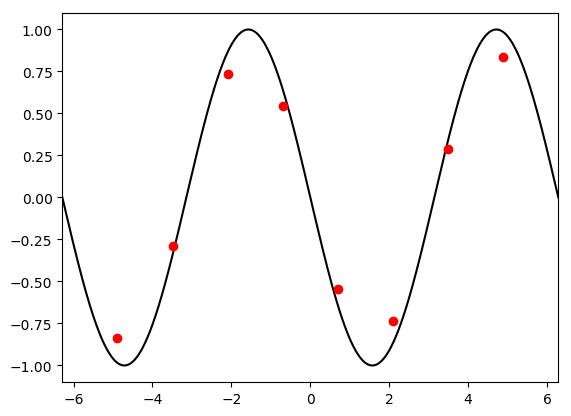

In [8]:
f = lambda x: numpy.sin(x)
f_dubl_prime = lambda x: -numpy.sin(x)

# Use uniform discretization
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 10
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] - x_hat[0]

# Compute derivative
f_dubl_prime_hat = numpy.empty(x_hat.shape)
f_dubl_prime_hat[1:-1] = (f(x_hat[2:]) -2.0 * f(x_hat[1:-1]) + f(x_hat[:-2])) / (delta_x**2)

# Use first-order differences for points at edge of domain
f_dubl_prime_hat[0] = (2.0 * f(x_hat[0]) - 5.0 * f(x_hat[1]) + 4.0 * f(x_hat[2]) - f(x_hat[3])) / delta_x**2
f_dubl_prime_hat[-1] = (2.0 * f(x_hat[-1]) - 5.0 * f(x_hat[-2]) + 4.0 * f(x_hat[-3]) - f(x_hat[-4])) / delta_x**2

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_dubl_prime(x), 'k')
axes.plot(x_hat, f_dubl_prime_hat, 'ro')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((-1.1, 1.1))

plt.show()

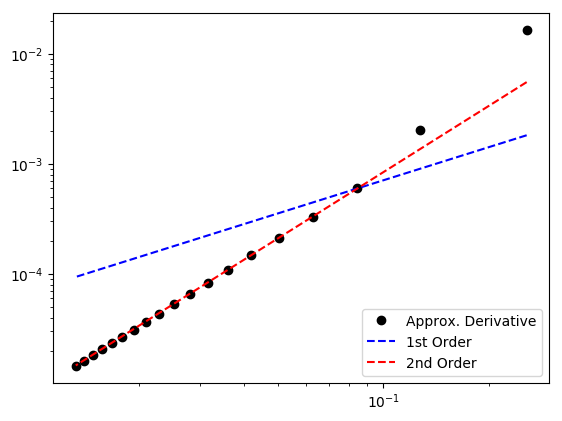

In [9]:
f = lambda x: numpy.sin(x)
f_dubl_prime = lambda x: -numpy.sin(x)

# Compute the error as a function of delta_x
delta_x = []
error = []
# for N in xrange(2, 101):
for N in range(50, 1000, 50):
    x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
    delta_x.append(x_hat[1] - x_hat[0])

    # Compute derivative
    f_dubl_prime_hat = numpy.empty(x_hat.shape)
    f_dubl_prime_hat[1:-1] = (f(x_hat[2:]) -2.0 * f(x_hat[1:-1]) + f(x_hat[:-2])) / (delta_x[-1]**2)

    # Use second-order differences for points at edge of domain
    f_dubl_prime_hat[0] = (2.0 * f(x_hat[0]) - 5.0 * f(x_hat[1]) + 4.0 * f(x_hat[2]) - f(x_hat[3])) / delta_x[-1]**2
    f_dubl_prime_hat[-1] = (2.0 * f(x_hat[-1]) - 5.0 * f(x_hat[-2]) + 4.0 * f(x_hat[-3]) - f(x_hat[-4])) / delta_x[-1]**2
    
    error.append(numpy.linalg.norm(numpy.abs(f_dubl_prime(x_hat) - f_dubl_prime_hat), ord=numpy.infty))
    
error = numpy.array(error)
delta_x = numpy.array(delta_x)
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

# axes.plot(delta_x, error)
axes.loglog(delta_x, error, "ko", label="Approx. Derivative")
order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[2], error[2], 1.0) * delta_x**1.0, 'b--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[2], error[2], 2.0) * delta_x**2.0, 'r--', label="2nd Order")
axes.legend(loc=4)

plt.show()